In [1]:
#!pip install transformers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the necessary classes from the transformers library
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained('roberta-large-mnli')

# Load the pre-trained model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained('roberta-large-mnli')


Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
youtube = pd.read_csv('US_youtube_trending_data.csv')
#category = pd.read_json('US_category_id.json')

In [4]:
youtube.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [5]:
#Checking for missing values
youtube.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4153
dtype: int64

In [6]:
#Summary of statistics
youtube.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,201189.000000,2.011890e+05,2.011890e+05,201189.000000,2.011890e+05
mean,18.791629,2.508551e+06,1.290980e+05,1515.386254,1.073141e+04
std,6.758220,7.220849e+06,4.117229e+05,9270.381937,8.128241e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.776620e+05,1.853000e+04,0.000000,1.325000e+03
50%,20.000000,9.635690e+05,4.236400e+04,0.000000,2.915000e+03
75%,24.000000,2.157026e+06,1.053410e+05,823.000000,6.858000e+03
max,29.000000,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06


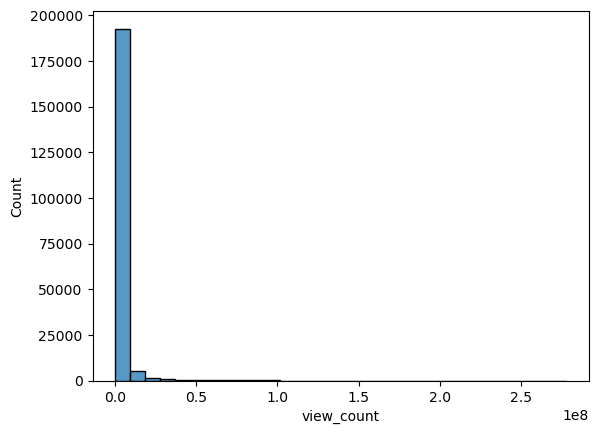

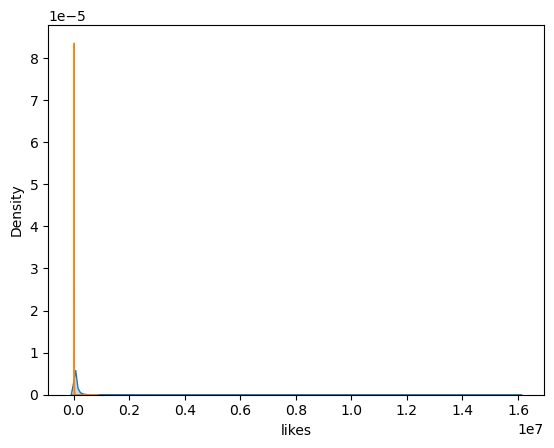

In [7]:
#Checking Distribution of variables
sns.histplot(data=youtube, x='view_count', bins=30)
plt.show()

sns.kdeplot(data=youtube, x='likes', fill=True)
sns.kdeplot(data=youtube, x='dislikes', fill=True)
plt.show()

/var/folders/lf/4v7fm2gs5ls0n62zw2bv002m0000gp/T/ipykernel_3055/2231554582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = youtube.corr()


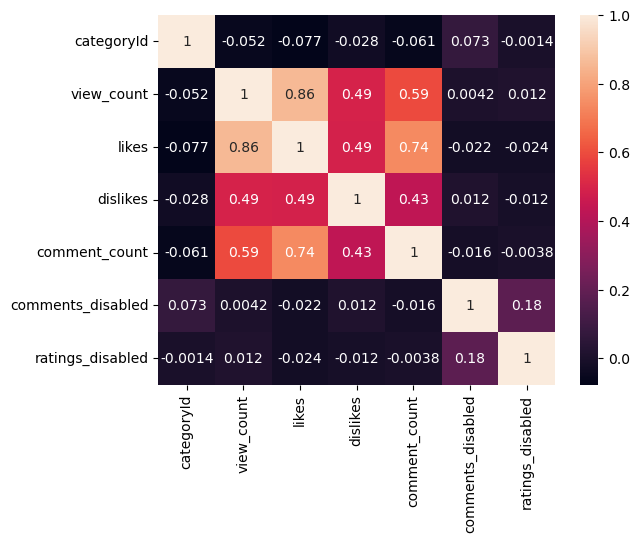

In [8]:
#Correlation matrix
corr_matrix = youtube.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
#Checking the shape and columns of the df
print('Youtube, Columns')
print(youtube.shape)
youtube.columns

In [ ]:
#Sorting by Likes and then getting most liked video
youtube.sort_values( by = 'likes', ascending = False).reset_index().get('title')[0]

In [ ]:
#Preprocess text data
title_col = youtube['title']
encoded_text = tokenizer(title_col.tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')
outputs = model(**encoded_text)
probs = outputs[0].softmax(dim=1)
clickbait_prob = probs[0][1].item()


In [ ]:
#Create a function to apply the NLP model to each title
def predict_clickbait(title):
    encoded_text = tokenizer(title, padding=True, truncation=True, max_length=128, return_tensors='pt')
    outputs = model(**encoded_text)
    probs = outputs[0].softmax(dim=1)
    clickbait_prob = probs[0][1].item()
    return clickbait_prob

youtube['clickbait'] = youtube['title'].apply(predict_clickbait)

In [ ]:
youtube.head()